# 多层感知机

### 真正的深度网络来力，其中最简单的就是多层感知机
#### 多层感知机由多层神经元组成， 每一层与它的上一层相连，从中接收输入； 
#### 同时每一层也与它的下一层相连，影响当前层的神经元

## 4.1. 多层感知机

### 4.1.1. 隐藏层

#### 仿射变换中的线性是一个很强的假设

### 4.1.1.1. 线性模型可能会出错

#### 然而我们可以很容易找出违反单调性的例子
#### 例如，我们想要根据体温预测死亡率
#### 对体温高于37摄氏度的人来说，温度越高风险越大。 然而，对体温低于37摄氏度的人来说，温度越高风险就越低
#### 在这种情况下，我们也可以通过一些巧妙的预处理来解决问题如将体温与37度的距离设为特征

#### 我们的数据可能会有一种考虑到特征间相互作用的表示，在此基础上建立线性模型是合适的
#### 对于深度神经网络，我们使用观测数据来联合学习隐藏层表示和应用于该表示的线性预测器

### 4.1.1.2. 在网络中加入隐藏层

#### 在网络中加入一或多个隐藏层来克服线性模型的限制，使其能处理更普遍的函数关系类型
#### 最简单的方法就是将许多全连接层堆叠在一起
#### 每一层都输出到上面的层，直到生成最后的输出
####  我们可以把前$L-1$层看作表示，把最后一层看作线性预测器
#### 这种架构通常称为多层感知机（multilayer perceptron），MLP

#### <img src="https://zh.d2l.ai/_images/mlp.svg" alt="一个单隐藏层的多层感知机，具有5个隐藏单元">

#### 这个多层感知机有4个输入，3个输出，其隐藏层包含5个隐藏单元
#### 输入层不涉及任何计算，因此使用此网络产生输出只需要实现隐藏层和输出层的计算。 
#### 因此，这个多层感知机中的层数为2
#### 因为两个层是全连接的，所以输入会影响隐藏层中的每个神经元

#### 具有全连接层的多层感知机的参数开销可能会高得令人望而却步
#### 可能在参数节约和模型有效性之间进行权衡 (Zhang et al., 2021)

### 4.1.1.3. 从线性到非线性

#### 线性模型的局限性
##### 矩阵表示法：使用矩阵来表示具有多个特征的样本批次。
##### 单隐藏层的MLP：包含隐藏单元，以及隐藏层和输出层的权重和偏置。
##### 问题：如果没有非线性，增加隐藏层不会扩展模型的能力超越仿射函数。

#### 非线性的重要性
##### 仿射函数的限制：仅包含仿射变换的MLP本质上是线性的，限制了其表达能力。
##### 解决方案 - 激活函数：
在每个仿射变换后应用非线性激活函数。
这种方法确保MLP不能被简化为线性模型。
激活函数对每个元素操作，允许独立计算每个激活值。
构建复杂的MLP
##### 堆叠层：可以堆叠更多层（例如，...），以增强模型的表达能力。
##### 独立激活：每个激活值的计算不需要考虑其他隐藏单元的值，适用于大多数激活函数。

### 4.1.1.4. 通用近似定理

#### 设计隐藏节点来执行任意计算
#### 在一对输入上进行基本逻辑操作，多层感知机是通用近似器


### 4.1.2. 激活函数

#### 激活函数（activation function）通过计算加权和并加上偏置来确定神经元是否应该被激活
#### 将输入信号转换为输出的可微运算，大多数激活函数都是非线性的

In [1]:
%matplotlib inline
import torch
from fc import torch as fc

### 4.1.2.1. ReLU函数

#### 最受欢迎的激活函数是修正线性单元（Rectified linear unit，ReLU）
#### 因为它实现简单，同时在各种预测任务中表现良好
#### $$ \operatorname{ReLU}(x) = \max(x, 0).$$

#### 通俗地说，ReLU函数通过将相应的活性值设为0，仅保留正元素并丢弃所有负元素

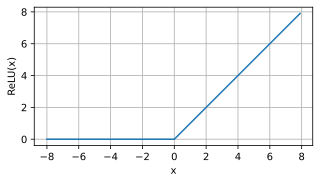

In [2]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.relu(x)
fc.plot(x.detach(), y.detach(), 'x', 'ReLU(x)', figsize=(5, 2.5))

#### 输入值精确等于0时，ReLU函数不可导。 在此时，我们默认使用左侧的导数
#### “如果微妙的边界条件很重要，我们很可能是在研究数学而非工程”

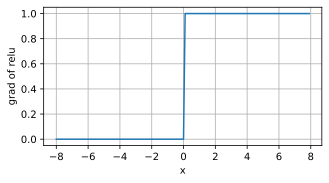

In [3]:
y.backward(torch.ones_like(x), retain_graph=True)
fc.plot(x.detach(), x.grad, 'x', 'grad of relu', figsize=(5, 2.5))

#### 使用ReLU的原因是，它求导表现得特别好：要么让参数消失，要么让参数通过
#### 这使得优化表现得更好，并且ReLU减轻了困扰以往神经网络的梯度消失问题

#### ReLU函数有许多变体，包括参数化ReLU（Parameterized ReLU，pReLU） 函数
#### 该变体为ReLU添加了一个线性项，因此即使参数是负的，某些信息仍然可以通过：
#### $$ \operatorname{pReLU}(x) = \max(0, x) + \alpha \min(0, x). $$

### 4.1.2.2. sigmoid函数

#### 对于一个定义域在$\mathbb{R}$中的输入， sigmoid函数将输入变换为区间(0, 1)上的输出
#### 因此，sigmoid通常称为挤压函数（squashing function）： 
#### 它将范围（-inf, inf）中的任意输入压缩到区间（0, 1）中的某个值：
#### $$ \operatorname{sigmoid}(x) = \frac{1}{1 + \exp(-x)}. $$

#### 早年，科学家们感兴趣的是对“激发”或“不激发”的生物神经元进行建模
#### 阈值单元在其输入低于某个阈值时取值0，当输入超过阈值时取值1。

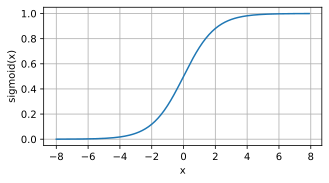

In [4]:
y = torch.sigmoid(x)
fc.plot(x.detach(), y.detach(), 'x', 'sigmoid(x)', figsize=(5, 2.5))

#### sigmoid函数的导数为下面的公式：
#### $$ \frac{d}{dx} \operatorname{sigmoid}(x) = \frac{\exp(-x)}{(1 + \exp(-x))^2} = \operatorname{sigmoid}(x)\left(1-\operatorname{sigmoid}(x)\right).$$

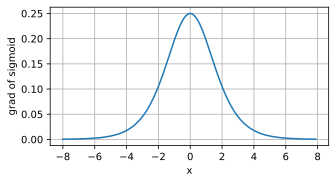

In [5]:
# 清除梯度
x.grad.data.zero_()
y.backward(torch.ones_like(x), retain_graph=True)
fc.plot(x.detach(), x.grad, 'x', 'grad of sigmoid', figsize=(5, 2.5))

### 4.1.2.3. tanh函数

#### 与sigmoid函数类似， tanh(双曲正切)函数也能将其输入压缩转换到区间(-1, 1)上，公式如下：
#### $$ \operatorname{tanh}(x) = \frac{1 - \exp(-2x)}{1 + \exp(-2x)}.$$

#### 注意，当输入在0附近时，tanh函数接近线性变换。 
#### 函数的形状类似于sigmoid函数， 不同的是tanh函数关于坐标系原点中心对称。

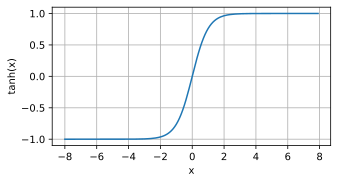

In [6]:
y = torch.tanh(x)
fc.plot(x.detach(), y.detach(), 'x', 'tanh(x)', figsize=(5, 2.5) )

#### tanh函数的导数是：
#### $$ \frac{d}{dx} \operatorname{tanh}(x) = 1 - \operatorname{tanh}^2(x).$$

#### 当输入接近0时，tanh函数的导数接近最大值1

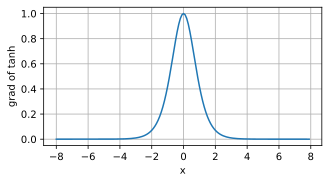

In [7]:
# 清除以前的梯度
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
fc.plot(x.detach(), x.grad, 'x', 'grad of tanh', figsize=(5, 2.5))

#### 我们了解了如何结合非线性函数来构建具有更强表达能力的多层神经网络架构
#### 现在的🧀相当于掌握了90年代深度学习工作者的工具

### 4.1.3. 小结

#### 多层感知机在输出层和输入层之间增加一个或多个全连接隐藏层，通过激活函数转化隐藏层的输出
#### 常用的激活函数包括ReLU函数、sigmoid函数和tanh函数

### 4.1.4 练习

#### 1. 计算pReLU激活函数的导数。
#### 2. 证明一个仅使用ReLU（或pReLU）的多层感知机构造了一个连续的分段线性函数。
#### 3. 证明tanh(�)+1=2sigmoid(2�)。
#### 4. 假设我们有一个非线性单元，将它一次应用于一个小批量的数据。这会导致什么样的问题？

## 4.2. 多层感知机的从零开始实现

#### 现在让我们尝试自己实现一个多层感知机
#### 继续使用Fashion-MNIST图像分类数据集

In [8]:
from torch import nn

batch_size = 256
train_iter, test_iter = fc.load_data_fashion_mnist(batch_size)

### 4.2.1. 初始化模型参数

#### Fashion-MNIST中的每个图像由784个灰度像素值组成。 所有图像共分为10个类别
#### 忽略像素空间结构，将每个图像视为具有784个输入特征 和10个类的简单分类数据集
#### 我们将实现一个具有单隐藏层的多层感知机， 它包含256个隐藏单元
#### 我们可以将这两个变量（特征和类？）都视为超参数
#### 通常，我们选择2的若干次幂作为层的宽度

#### 我们用几个张量来表示我们的参数。 每一层都要记录一个权重矩阵和一个偏置向量。 
#### 要为损失关于这些参数的梯度分配内存。

In [9]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256

W1 = nn.Parameter(torch.randn(
    num_inputs, num_hiddens, requires_grad=True) * 0.01)
b1 = nn.Parameter(torch.zeros(num_hiddens, requires_grad=True))
W2 = nn.Parameter(torch.randn(
    num_hiddens, num_outputs, requires_grad=True) * 0.01)
b2 = nn.Parameter(torch.zeros(num_outputs, requires_grad=True))

params = [W1, b1, W2, b2]

In [15]:
# test 1
# num_inputs, num_outputs, num_hiddens = 784, 10, 512

# W1 = nn.Parameter(torch.randn(
#     num_inputs, num_hiddens, requires_grad=True) * 0.01)
# b1 = nn.Parameter(torch.zeros(num_hiddens, requires_grad=True))
# W2 = nn.Parameter(torch.randn(
#     num_hiddens, num_outputs, requires_grad=True) * 0.01)
# b2 = nn.Parameter(torch.zeros(num_outputs, requires_grad=True))

# params = [W1, b1, W2, b2]

### 4.2.2. 激活函数

In [16]:
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)

### 4.2.3. 模型

#### 用reshape将每个二维图像转换为一个长度为num_inputs的向量

In [17]:
def net(X):
    X = X.reshape((-1, num_inputs))
    H = relu(X@W1 + b1)  # 这里“@”代表矩阵乘法
    return (H@W2 + b2)

### 4.2.4 损失函数

#### 直接使用高级API中的内置函数来计算softmax和交叉熵损失

In [18]:
loss = nn.CrossEntropyLoss(reduction='none')

### 4.2.5. 训练

### 直接的调fc包的train_ch3函数 将迭代周期数设置为10，并将学习率设置为0.1.

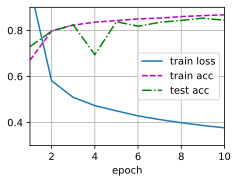

In [19]:
num_epoches = 10
lr = 0.1
updater = torch.optim.SGD(params, lr=lr)
fc.train_ch3(net, train_iter, test_iter, loss, num_epoches, updater)

#### test 一波

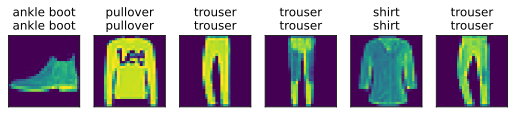

In [20]:
fc.predict_ch3(net, test_iter)

### 4.2.6. 小结

#### 两层确实简单，就是第一层输出激活后进第二层
#### but，层数一上来就会很麻烦

### 4.2.7. 练习

#### 1. 在所有其他参数保持不变的情况下，更改超参数`num_hiddens`的值，并查看此超参数的变化对结果有何影响。确定此超参数的最佳值。
试试奥
没太大区别吧， 可能test的accuracy中间会下滑一点

#### 2. 尝试添加更多的隐藏层，并查看它对结果有何影响。
可能会越来越准吧？

#### 3. 改变学习速率会如何影响结果？保持模型架构和其他超参数（包括轮数）不变，学习率设置为多少会带来最好的结果？
调的太快可能会越过一些重要的点，

#### 4. 通过对所有超参数（学习率、轮数、隐藏层数、每层的隐藏单元数）进行联合优化，可以得到的最佳结果是什么？


#### 5. 描述为什么涉及多个超参数更具挑战性。
可能变多了很多

#### 6. 如果想要构建多个超参数的搜索方法，请想出一个聪明的策略。

## 4.3 多层感知机的简单实现

In [22]:
import torch
from torch import nn

### 4.3.1. 模型

#### 与softmax回归的简洁实现（ 3.7节）相比， 唯一的区别是我们添加了2个全连接层

In [25]:
net = nn.Sequential(nn.Flatten(),
                    nn.Linear(784, 256),
                    nn.ReLU(),
                    nn.Linear(256, 10))
        
def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)
    
net.apply(init_weights);

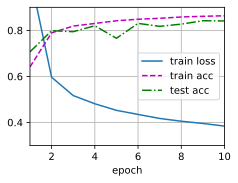

In [28]:
batch_size, lr, num_epochs = 256, 0.1, 10
loss = nn.CrossEntropyLoss(reduction='none')
trainer = torch.optim.SGD(net.parameters(), lr=lr)

train_iter, test_iter = fc.load_data_fashion_mnist(batch_size)
fc.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

### 4.3.2. 小结

#### 可以更简洁的实现，通过api
#### 对于相同的分类问题，多层感知机的实现与softmax回归的实现相同，只是mlp有激活函数

### 4.3.3. 练习

#### 1. 尝试添加不同数量的隐藏层（也可以修改学习率），怎么样设置效果最好？


#### 2. 尝试不同的激活函数，哪个效果最好？


#### 3. 尝试不同的方案来初始化权重，什么方法效果最好？